STT: 20

Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS105.M11.2

Buổi 03 - 25/10/2021


# [LAB 04 - Model Development](https://drive.google.com/file/d/1YMT7tUtC0ycMH3a2JxPtIF8LmjeCK_qH/preview)

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output 

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
url_data = 'https://raw.githubusercontent.com/datasethub/ds105/master/Model_Dataset_Lab.csv'

## **Câu 1**: Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [ ]:
df = pd.read_csv(url_data)
df.drop(df.columns[0], axis=1, inplace=True)
# Xuất 10 samples bất kỳ
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
145,2700,134,0.840942,0.918056,72.000000,31,39,104.9,3.43,rwd,18344.0
81,2579,132,0.872177,0.923611,104.256158,23,31,96.1,3.46,fwd,9295.0
165,2403,110,0.828448,0.908333,116.000000,23,30,96.3,3.17,fwd,9279.0
166,2710,164,0.849592,0.900000,121.000000,21,28,101.2,3.31,rwd,20970.0
168,2465,110,0.842864,0.905556,101.000000,24,28,96.5,3.15,fwd,12945.0
149,2304,110,0.842864,0.905556,86.000000,27,33,96.5,3.15,fwd,8845.0
100,2458,122,0.843825,0.923611,92.000000,27,32,102.4,3.31,fwd,11248.0
36,2280,92,0.815473,0.883333,62.000000,31,37,95.7,3.05,fwd,6918.0
19,2385,108,0.826526,0.908333,82.000000,24,25,97.0,3.62,4wd,9233.0
123,2254,109,0.765497,0.891667,90.000000,24,29,94.5,3.19,fwd,11595.0


In [ ]:
print('Dataset có {} sample và {} feature'.format(df.shape[0], df.shape[1]))

Dataset có 180 sample và 11 feature


**Nhận xét**: Dataset có 180 sample và 11 feature

## **Câu 2**: Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   curb-weight   180 non-null    int64  
 1   engine-size   180 non-null    int64  
 2   length        180 non-null    float64
 3   width         180 non-null    float64
 4   horsepower    180 non-null    float64
 5   city-mpg      180 non-null    int64  
 6   highway-mpg   180 non-null    int64  
 7   wheel-base    180 non-null    float64
 8   bore          180 non-null    float64
 9   drive-wheels  180 non-null    object 
 10  price         180 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 15.6+ KB


**Nhận xét**: Dataset không bị khuyết dữ liệu

##**Câu 3**: Phát triển mô hình hồi quy đơn biến cho từng feature sau: `'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'`.


In [ ]:
features = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']

In [ ]:
models = []
for i in features:
    lr = LinearRegression()
    models.append([lr.fit(df[i].values.reshape(-1,1), df['price']), lr.score(df[i].values.reshape(-1,1), df['price'])])

In [ ]:
models

[[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.7052521923275914],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.7596584287542104],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.49276779886843025],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.5840854904827371],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.6527261021204291],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.4767939694661241],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.5095276715927741],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.36276260287572804],
 [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.2772114769627062]]

## **Câu 4**: Phát họa regression plot và residual plot cho các feature sau: `'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'`.


<Figure size 864x3888 with 0 Axes>

Text(0.5, 1.0, 'Regression plot for curb-weight and price')

Text(0.5, 1.0, 'Residual plot for curb-weight and price')

Text(0.5, 1.0, 'Regression plot for engine-size and price')

Text(0.5, 1.0, 'Residual plot for engine-size and price')

Text(0.5, 1.0, 'Regression plot for length and price')

Text(0.5, 1.0, 'Residual plot for length and price')

Text(0.5, 1.0, 'Regression plot for width and price')

Text(0.5, 1.0, 'Residual plot for width and price')

Text(0.5, 1.0, 'Regression plot for horsepower and price')

Text(0.5, 1.0, 'Residual plot for horsepower and price')

Text(0.5, 1.0, 'Regression plot for city-mpg and price')

Text(0.5, 1.0, 'Residual plot for city-mpg and price')

Text(0.5, 1.0, 'Regression plot for highway-mpg and price')

Text(0.5, 1.0, 'Residual plot for highway-mpg and price')

Text(0.5, 1.0, 'Regression plot for wheel-base and price')

Text(0.5, 1.0, 'Residual plot for wheel-base and price')

Text(0.5, 1.0, 'Regression plot for bore and price')

Text(0.5, 1.0, 'Residual plot for bore and price')

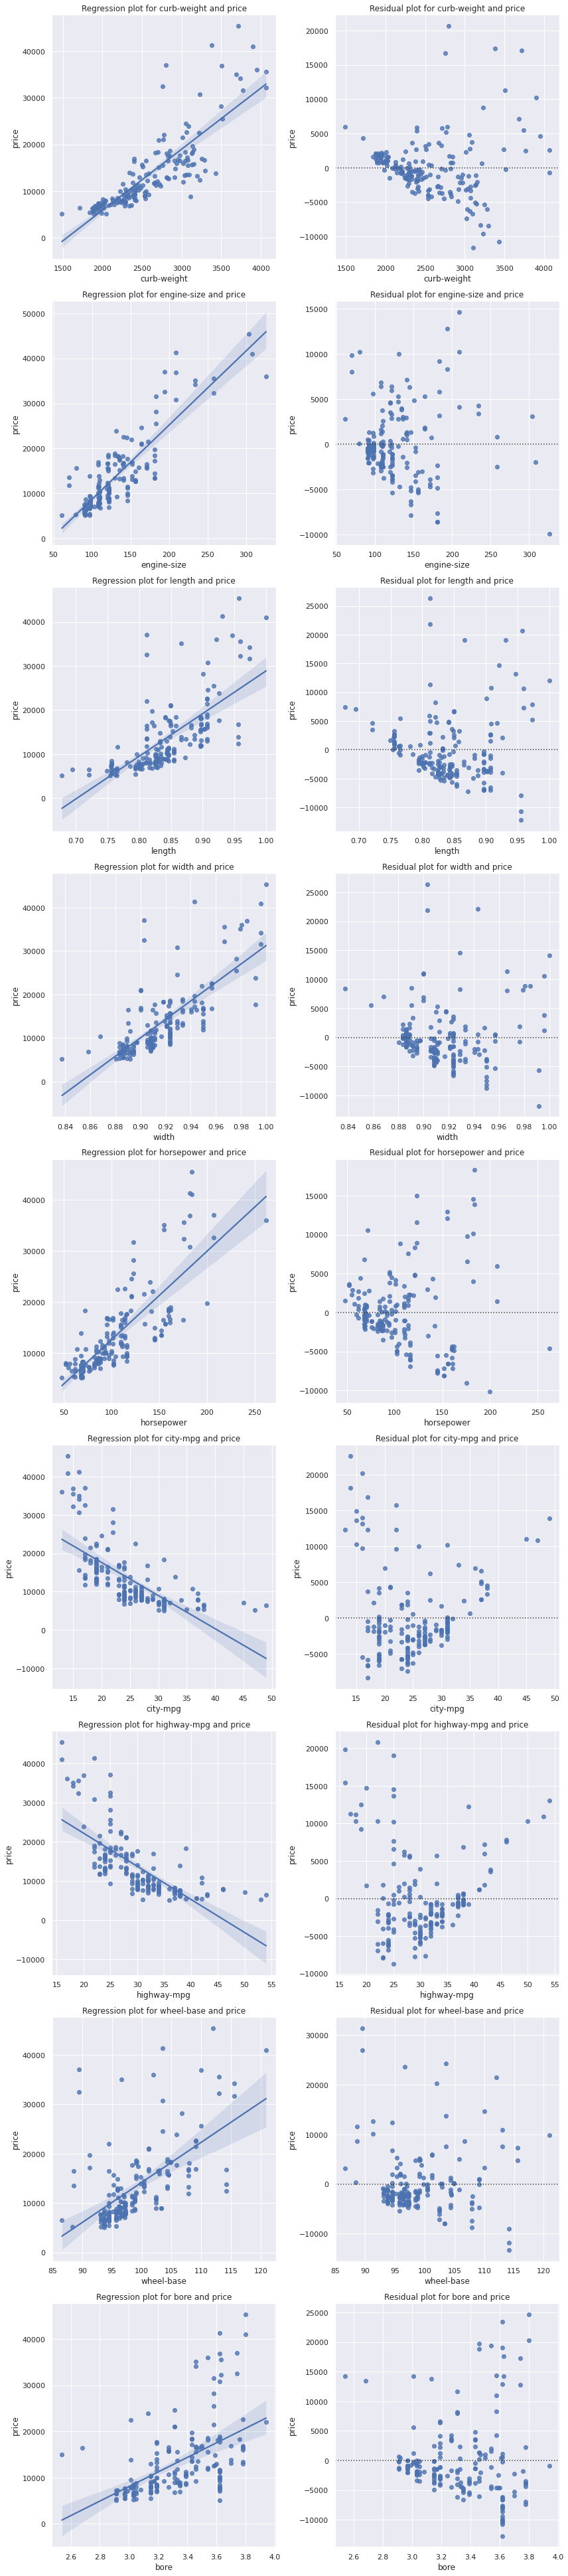

In [ ]:
plt.figure(figsize=(12, len(features)*6))

for i in range(len(features)):
    plt.subplot(len(features), 2, 2*i+1)
    sns.regplot(x=features[i], y='price', data=df)
    plt.title('Regression plot for {} and price'.format(features[i]))
    plt.subplot(len(features), 2, 2*i+2)
    sns.residplot(x=features[i], y='price', data=df)
    plt.title('Residual plot for {} and price'.format(features[i]))

plt.tight_layout()
plt.show()

## **Câu 5**: Dựa vào residual plot của câu 4, chuẩn đoán xem feature nào có thể phát triển theo phương pháp hồi quy tuyến tính? Giải thích lý do.


**Nhận xét**: Dựa vào residual plot của câu 4, thì feature `engine-size` có thể phát triển theo phương pháp hồi quy tuyến tính. Vì, có các datapoint trãi khá đều và ngẫu nhiên về 2 trục x=0 nên feature `engine-size` có thể phát triển theo phương pháp hồi quy tuyến tính.

## **Câu 6**: Xây dựng mô hình hồi quy đa biến cho các feature sau: `'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'`.


In [ ]:
feature_cau6 = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

### Xây dựng model với 2 feature

In [ ]:
def model_with_2_features(feature1, feature2):
  X_train_2 = df.loc[:, [feature1, feature2]].values
  y_train = df.loc[:,'price']
  lr = LinearRegression()
  lr.fit(X_train_2, y_train)
  return lr.score(X_train_2, y_train)

In [ ]:
dict_model_with_2_features = {}

for i in range(len(feature_cau6)):
  for j in range(i+1, len(feature_cau6)):
    key = 'score_with' + '_' + feature_cau6[i] + '_' + feature_cau6[j]
    dict_model_with_2_features[key] = model_with_2_features(feature_cau6[i], feature_cau6[j])

In [ ]:
dict_model_with_2_features

{'score_with_curb-weight_engine-size': 0.7932436538138823,
 'score_with_curb-weight_highway-mpg': 0.7080665644477686,
 'score_with_engine-size_highway-mpg': 0.782139752451274,
 'score_with_horsepower_curb-weight': 0.764747470647298,
 'score_with_horsepower_engine-size': 0.7821155304171414,
 'score_with_horsepower_highway-mpg': 0.6620354167205591}

### Xây dựng model với 3 feature

In [ ]:
def model_with_3_features(feature1, feature2, feature3):
  X_train_3 = df.loc[:, [feature1, feature2, feature3]].values
  y_train = df.loc[:,'price']
  lr = LinearRegression()
  lr.fit(X_train_3, y_train)
  return lr.score(X_train_3, y_train)

In [ ]:
dict_model_with_3_features = {}

for i in range(len(feature_cau6)):
  for j in range(i+1, len(feature_cau6)):
    for k in range(j+1, len(feature_cau6)):
      key = 'score_with' + '_' + feature_cau6[i] + '_' + feature_cau6[j] + '_' + feature_cau6[k]
      dict_model_with_3_features[key] = model_with_3_features(feature_cau6[i], feature_cau6[j], feature_cau6[k])

In [ ]:
dict_model_with_3_features

{'score_with_curb-weight_engine-size_highway-mpg': 0.7959861376876212,
 'score_with_horsepower_curb-weight_engine-size': 0.8050272314190562,
 'score_with_horsepower_curb-weight_highway-mpg': 0.7707318127259485,
 'score_with_horsepower_engine-size_highway-mpg': 0.7879013177119578}

### Xây dựng model với 4 feature

In [ ]:
X_train_4 = df.loc[:, features].values
y_train = df.loc[:,'price']
lr = LinearRegression()
lr.fit(X_train_4, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('score_with_{}_{}_{}_{} : {}'.format(feature_cau6[0], feature_cau6[1], feature_cau6[2], feature_cau6[3], lr.score(X_train_4, y_train)))

score_with_horsepower_curb-weight_engine-size_highway-mpg : 0.8160196610552581


## **Câu 7**: Xây dựng mô hình hồi quy đa biến cho các feature sau: `'horsepower', 'highway-mpg'`.

In [ ]:
X_train_cau7 = df.loc[:, ['horsepower', 'highway-mpg']].values
y_train = df.loc[:,'price']
lr_cau7 = LinearRegression()
lr_cau7.fit(X_train_cau7, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('score_with_{}_{} : {}'.format('horsepower', 'highway-mpg', lr_cau7.score(X_train_cau7, y_train)))

score_with_horsepower_highway-mpg : 0.6620354167205591


## **Câu 8**: Xây dựng mô hình hồi quy đa biến cho các feature được cho là quan trọng.


### Feature kiểu số

<Figure size 864x864 with 0 Axes>

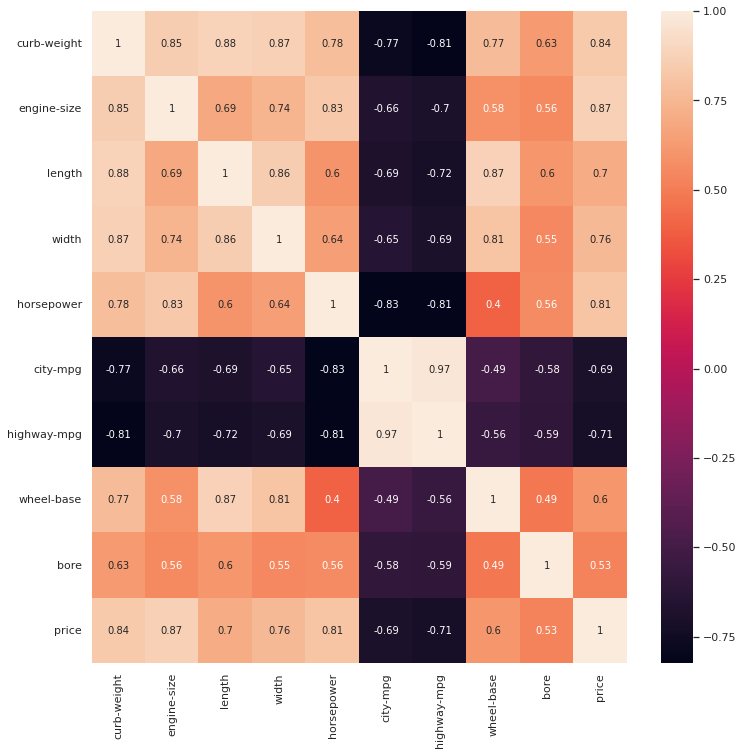

In [ ]:
plt.figure(figsize=(12,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Nhận xét**: Theo em các feature được cho là quan trọng là các feature có mối tương quan trung bình (có hệ số tương quan $ 0.5 \leq r \leq 0.8$ hoặc $ -0.5 \leq r \leq -0.8$) hoặc có mối tương quan mạnh (có hệ số tương quan $r \geq 0.8$ hoặc $r \leq -0.8$). Trong các feature ```['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']``` thì tất cả đều thỏa mãn các điều kiện trên nên tất cả các feature đều quan trọng.

### Feature kiểu category

In [ ]:
df_driveWheels = df[['drive-wheels', 'price']]
df_group_driveWheels = df_driveWheels.groupby(['drive-wheels'], as_index = False).mean()
df_group_driveWheels

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9281.009615
2,rwd,19779.294118


<Figure size 864x216 with 0 Axes>

Text(0.5, 1.0, 'AVG Price')

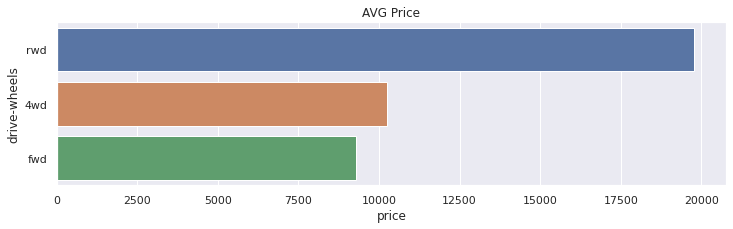

In [ ]:
plt.figure(figsize=(12,3))
sns.barplot(x='price', y='drive-wheels', data=df_group_driveWheels.sort_values('price', ascending=False))
plt.title('AVG Price')

<Figure size 576x720 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Drive Wheels vs Price')

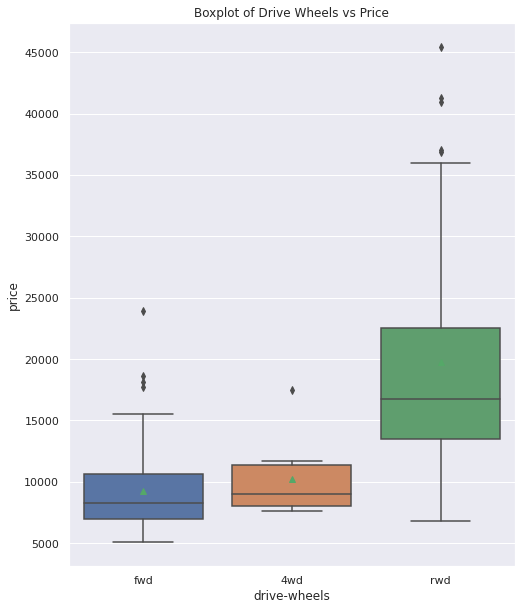

In [ ]:
plt.figure(figsize=(8,10))
sns.boxplot(x='drive-wheels', y='price', data=df, showmeans=True)
plt.title('Boxplot of Drive Wheels vs Price')
plt.show()

In [ ]:
df_anova = df[['drive-wheels', 'price']]
group_anova = df_anova.groupby(['drive-wheels'])

F_test, P_value = stats.f_oneway(group_anova.get_group('rwd')['price'],
                                 group_anova.get_group('fwd')['price'],
                                 group_anova.get_group('4wd')['price'])

print('F-test =', F_test)
print('P-value =', P_value)

F-test = 59.555271835204664
P-value = 1.6671183406285857e-20


**Nhận xét**:


*   Giá trị $p-value$ thu được từ phân tích ANOVA là có ý nghĩa thống kê $(p-value = 1.67 \times 10^{-20} <0,05)$, và do đó, chúng ta kết luận rằng có sự khác biệt đáng kể giữa các giá trị của feature `drive-wheels` tới giá trị của xe `price`. Vậy nên đây cũng là 1 feature quan trọng.



### Tiền xử lý dữ liệu

In [ ]:
X_train_cau8 = df.iloc[:, :-1]
y_train = df[['price']]

In [ ]:
# Get one hot encoding of columns drive-wheels
one_hot = pd.get_dummies(X_train_cau8['drive-wheels'])
# Drop column drive-wheels as it is now encoded
X_train_cau8 = X_train_cau8.drop('drive-wheels',axis = 1)
# Join the encoded df
X_train_cau8 = X_train_cau8.join(one_hot)

X_train_cau8

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,4wd,fwd,rwd
0,1967,90,0.755887,0.886111,68.000000,31,38,93.7,2.970000,0,1,0
1,2824,136,0.848630,0.922222,115.000000,18,22,99.4,3.190000,1,0,0
2,2695,121,0.896684,0.923611,110.000000,21,28,99.1,3.540000,0,1,0
3,2405,122,0.828448,0.908333,88.000000,25,32,96.3,3.350000,0,1,0
4,2275,110,0.799135,0.894444,56.000000,34,36,95.7,3.270000,0,1,0
5,3016,171,0.881788,0.940278,161.000000,19,24,102.9,3.270000,0,0,1
6,2414,122,0.843825,0.923611,92.000000,27,32,102.4,3.310000,0,1,0
7,1918,90,0.755887,0.886111,68.000000,37,41,93.7,2.970000,0,1,0
8,2024,92,0.754926,0.887500,76.000000,30,34,96.5,2.920000,0,1,0
9,1940,92,0.720807,0.888889,76.000000,30,34,93.7,2.910000,0,1,0


### Xây dựng mô hình

In [ ]:
lr_cau8 = LinearRegression()
lr_cau8.fit(X_train_cau8, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_cau8.score(X_train_cau8, y_train)

0.8294102327381803

## **Câu 9**: Phát họa distribution plot thể hiện giữa giá trị thực và giá trị dự đoán từ các mô hình đã xây dựng


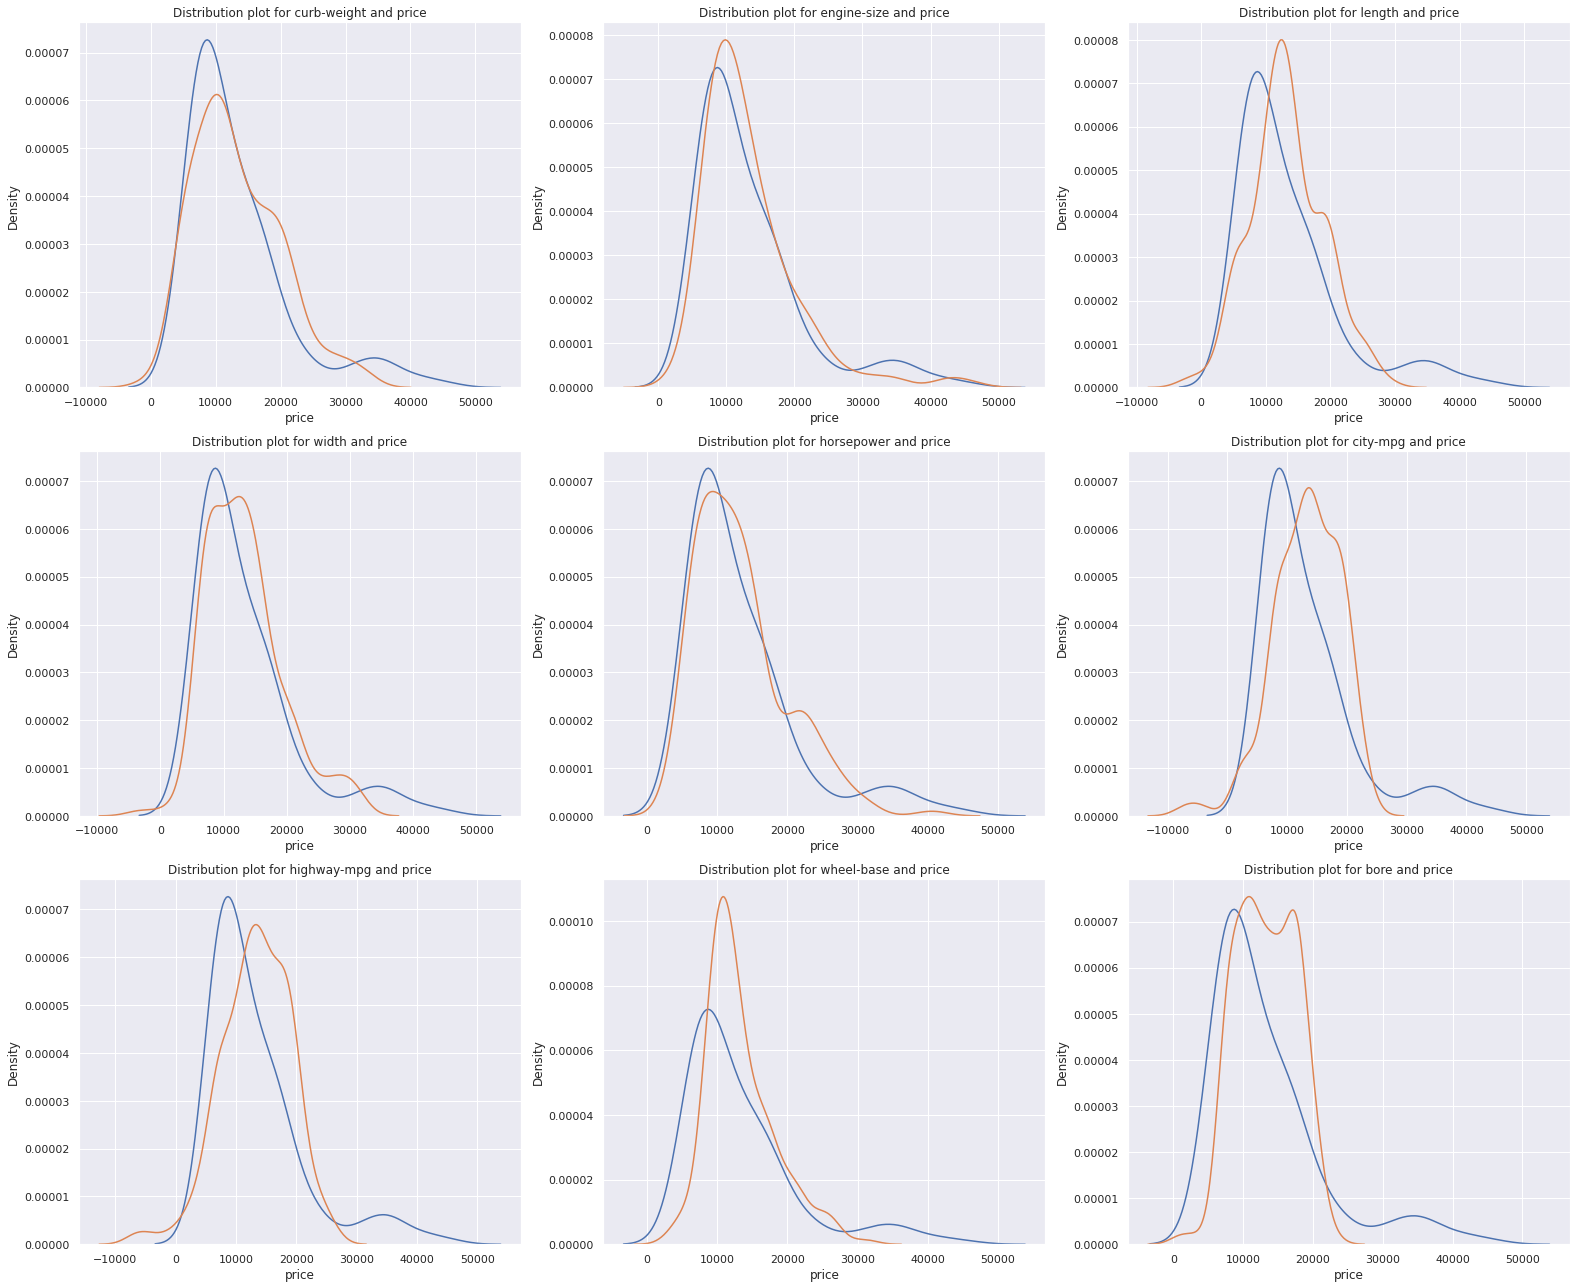

In [ ]:
plt.figure(figsize=(22,18))
for i in range(len(features)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df['price'], hist=False, label='Actual price')
    sns.distplot(models[i][0].predict(df[[features[i]]].values.reshape(-1,1)), hist=False, label='Predicted price')
    plt.title('Distribution plot for {} and price'.format(features[i]))
    plt.ticklabel_format(style='plain')
    plt.tight_layout()
clear_output()
plt.show()

## **Câu 10**: Dựa vào các distribution plot và residual plot nhận xét xem các feature nào là quan trọng để phát triển mô hình.


**Nhận xét**: Dựa vào các distribution plot và residual plt ta có thể thấy rằng `'engine-size','width','horsepower'` là các feature quan trọng để phát triển mô hình.

## **Câu 11**: *Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc `'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'`.


In [ ]:
features = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']

In [ ]:
def train_model(*features):
  X_train_cau11 = df[features[0]].values
  y_train = df.loc[:,'price']
  lr_cau11 = LinearRegression()
  return lr_cau11.fit(X_train_cau11, y_train), lr_cau11.score(X_train_cau11, y_train)

In [ ]:
model_cau11 = {}
while True:
  print('Danh sách các feature có thể sử dụng để train model:')
  for i in range(len(features)):
    print(i, ':', features[i])
  index = input('Nhập danh sách chỉ số của feature muốn sử dụng để train model:').split()
  key = 'model_with_feature'
  lst_features = []
  for i in index:
    key += '_' + features[int(i)]
    lst_features.append(features[int(i)])

  model_cau11[key] = train_model(lst_features)
  print('='*10 + 'Bạn có muốn tiếp trục train model hay không?' + '='*10)
  Continue = int(input('1 - tiếp tục \n-1 - kết thúc'))
  if Continue == -1:
    break

Danh sách các feature có thể sử dụng để train model:
0 : curb-weight
1 : engine-size
2 : length
3 : width
4 : horsepower
5 : city-mpg
6 : highway-mpg
7 : wheel-base
8 : bore
Nhập danh sách chỉ số của feature muốn sử dụng để train model:0 1 4
==========Bạn có muốn tiếp trục train model hay không?==========
1 - tiếp tục 
-1 - kết thúc-1


In [ ]:
model_cau11

{'model_with_feature_curb-weight_engine-size_horsepower': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  0.8050272314190564)}